# steps

1.  import the libraries
2. import the data set
3. perform data analysis EDA
4.  feature scalling
5.  encoding
6. feature selection
7. choosing model - logistic regression
8. split data - cv
8. trainning the model
9. testing the model
10. performance - confusion matrix

 import the libraries

In [55]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

 import the dataset

In [56]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

perform data analysis

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
df.shape

(891, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

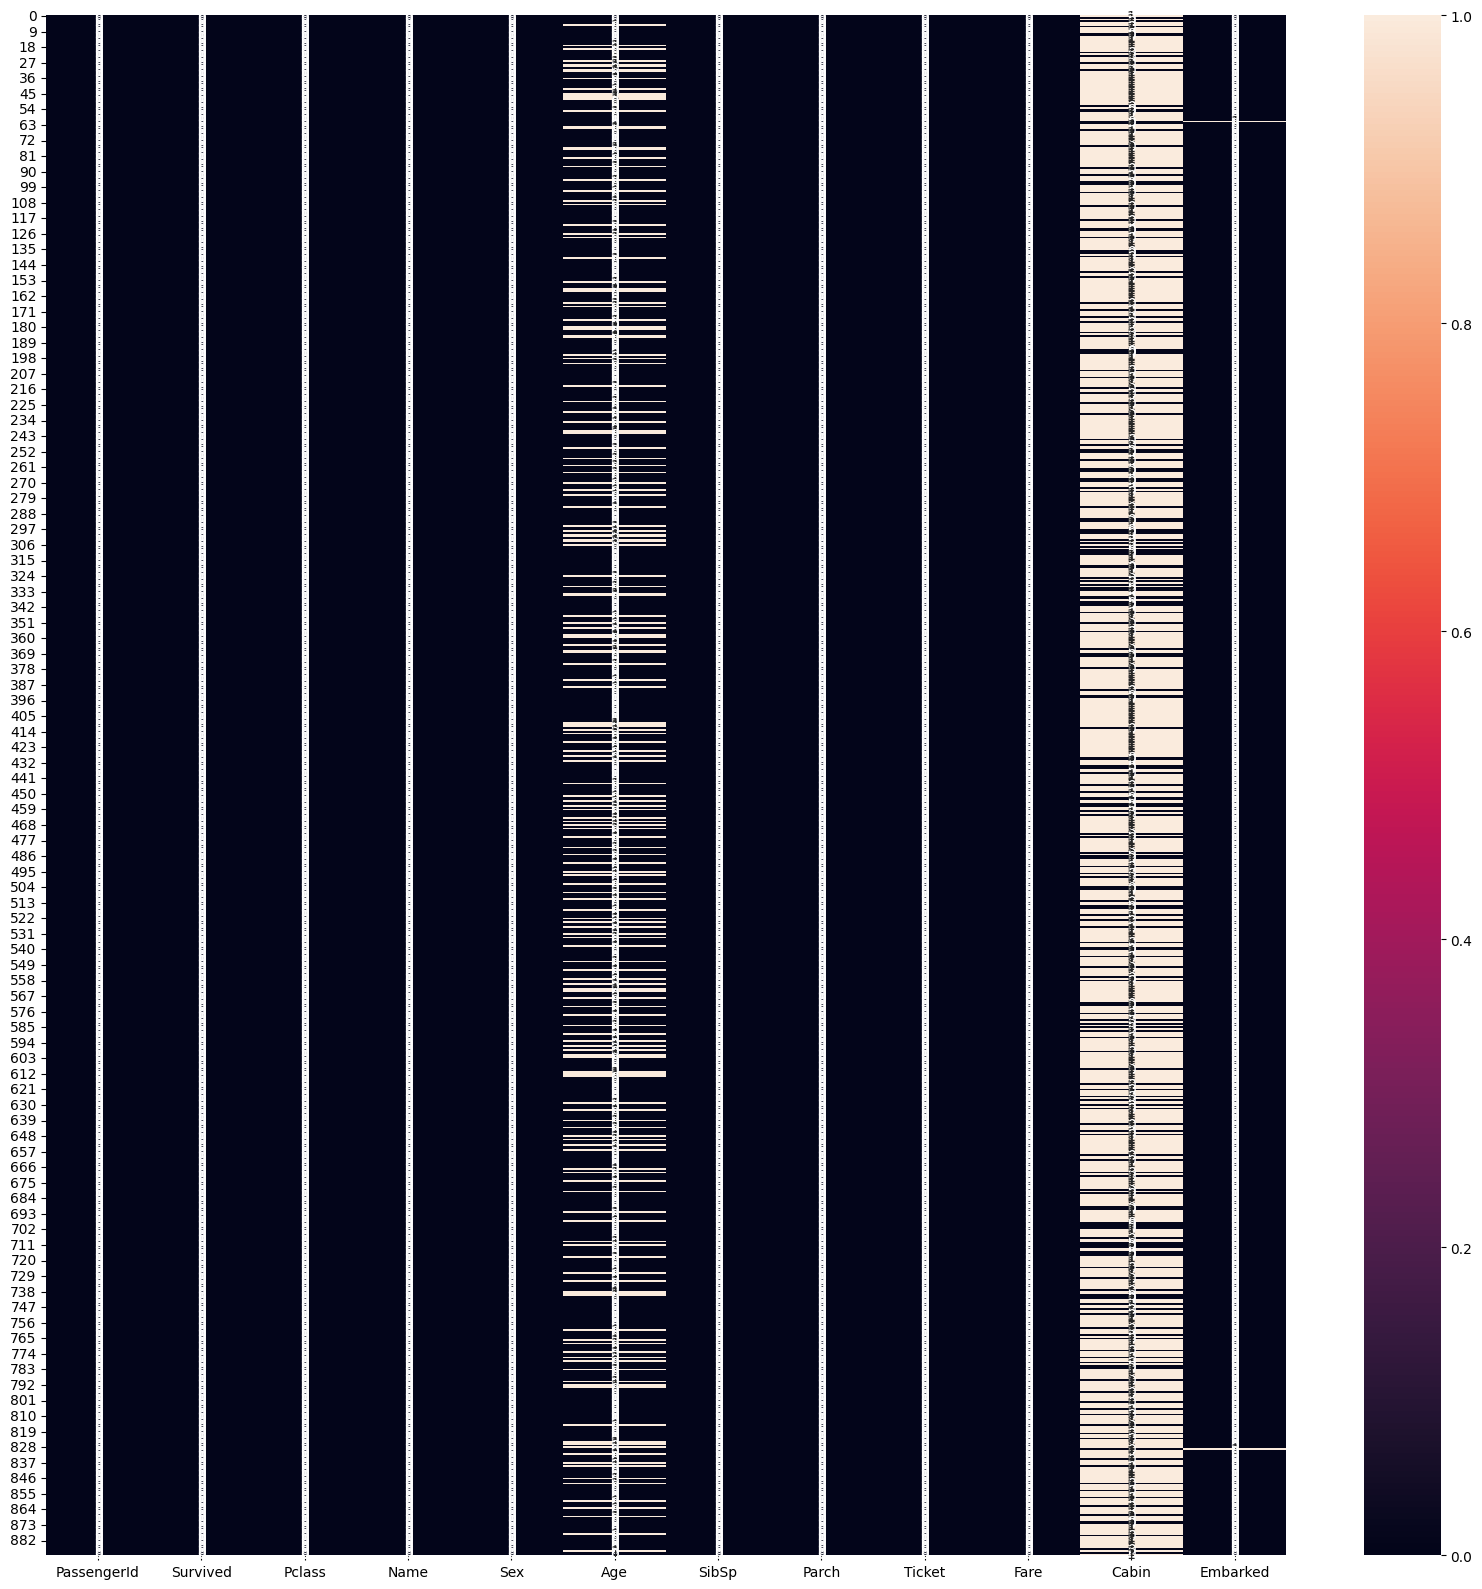

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True)

In [63]:
# age % null value
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [64]:
# cabin % null value
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [65]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [66]:
# drop the cabin column
df.drop('Cabin',axis=1,inplace=True)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [69]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [70]:
# show the null embarked null values
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [71]:
# show the data point Embarked is null where pclass==1
df.loc[df.Pclass==1,'Embarked'].value_counts()


S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [72]:
# show the data point Embarked is null where pclass==2
df.loc[df.Pclass==2,'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [73]:
# show the data point Embarked is null where pclass==3
df.loc[df.Pclass==3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [74]:
# show the  all data point Embarked is null where Ticket ==113572
df.loc[df.Ticket==113572,'Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: Embarked, dtype: object)>

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
# mean of the Age column
df.Age.mean()

29.64209269662921

In [78]:
# median of the Age column
df.Age.median()

28.0

In [79]:
# mode of the column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

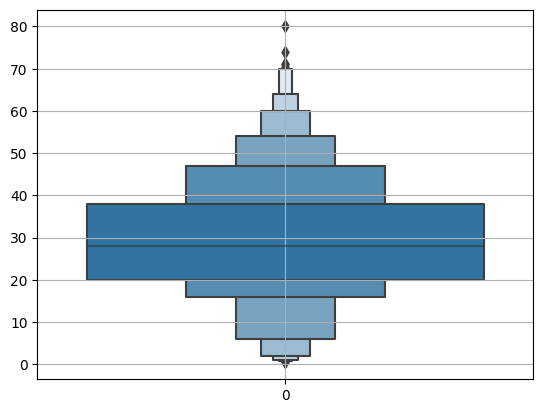

In [80]:
# plot the box plot to find out the outliers
sns.boxenplot(df.Age)
plt.grid()

In [81]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [82]:
# fill the null valuest to median value for Age
df.Age.fillna(value=df.Age.median(),inplace=True)

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
# drop the column - passengerID,Name,Ticket
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [86]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


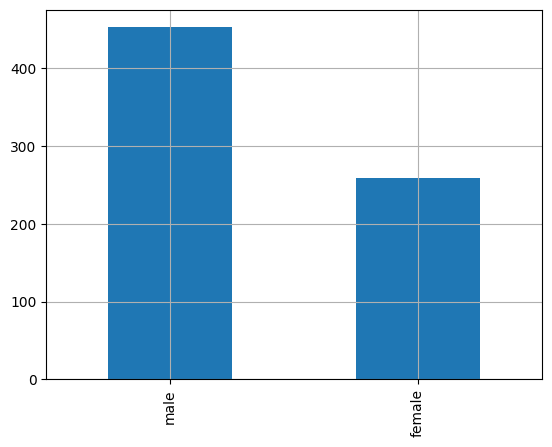

In [87]:
# plot the graph strength male vs Strength female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

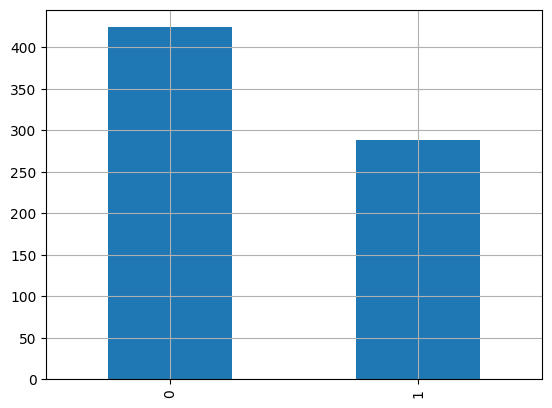

In [88]:
# plot the graph strength of survival vs Strength non-survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

<Axes: xlabel='Survived', ylabel='count'>

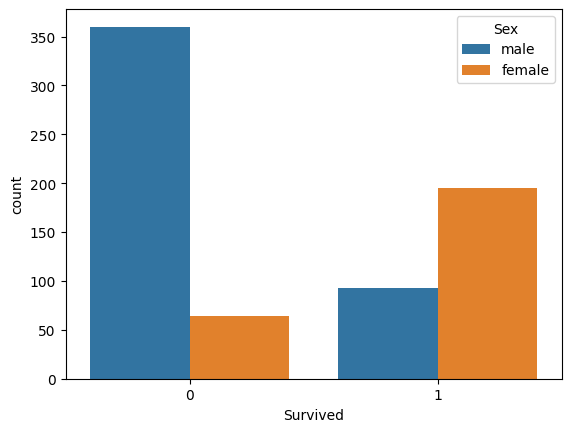

In [89]:
# plot the graph to find survived and non-survived w.r.t Sex
sns.countplot(x='Survived',data=df,hue='Sex')

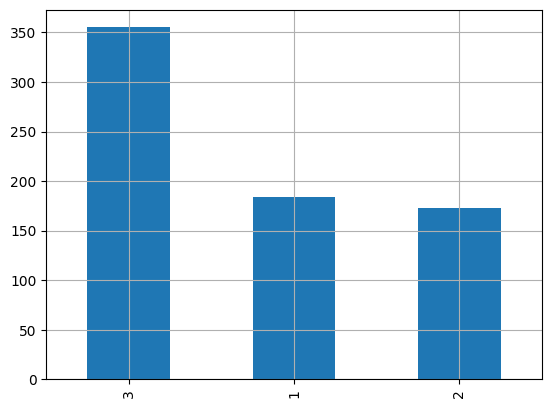

In [90]:
# plot the graph find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

<Axes: xlabel='Survived', ylabel='count'>

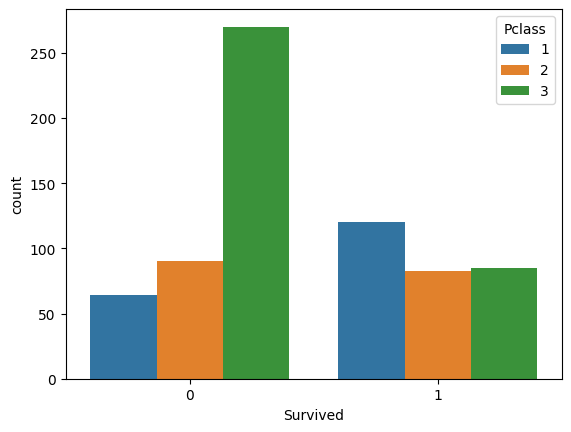

In [91]:
# plot the graph to find survived and non-survived w.r.t Pclass
sns.countplot(x='Survived',data=df,hue='Pclass')

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [109]:
df.Age= df.Age.astype(int)

In [111]:
df.Fare = round(df.Fare,2)

 Encoders - convert data to categorical data to numeric form changing its meaning

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
enc = LabelEncoder()

In [106]:
df.Sex = enc.fit_transform(df.Sex)

In [112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [113]:
newdf=df.copy()

In [114]:
new=df.copy()

In [115]:
df=pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)

In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [117]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    int64  
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Q         712 non-null    uint8  
 8   S         712 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 62.1 KB


<Axes: >

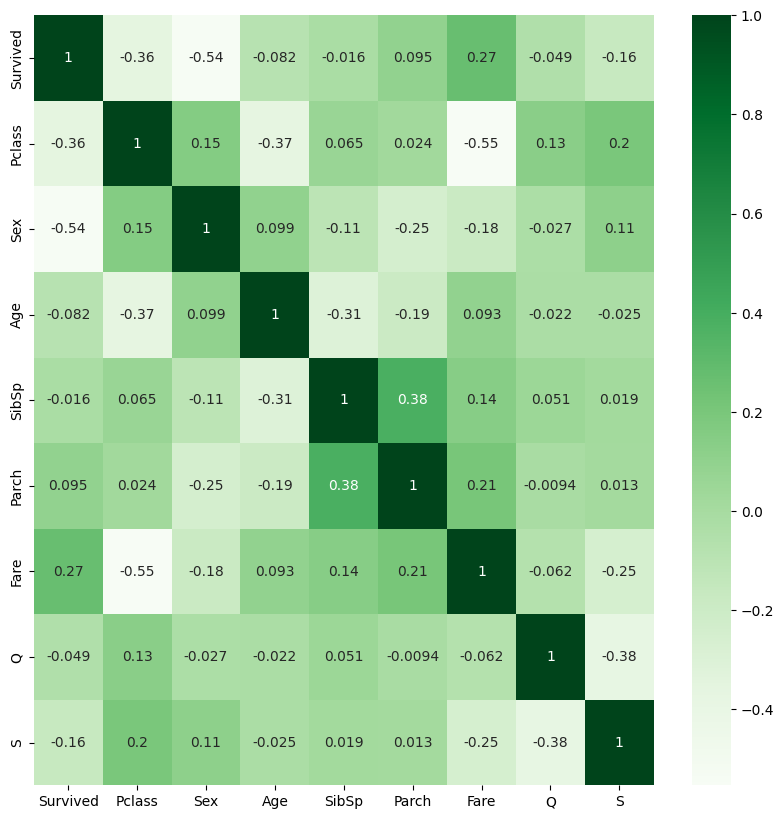

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

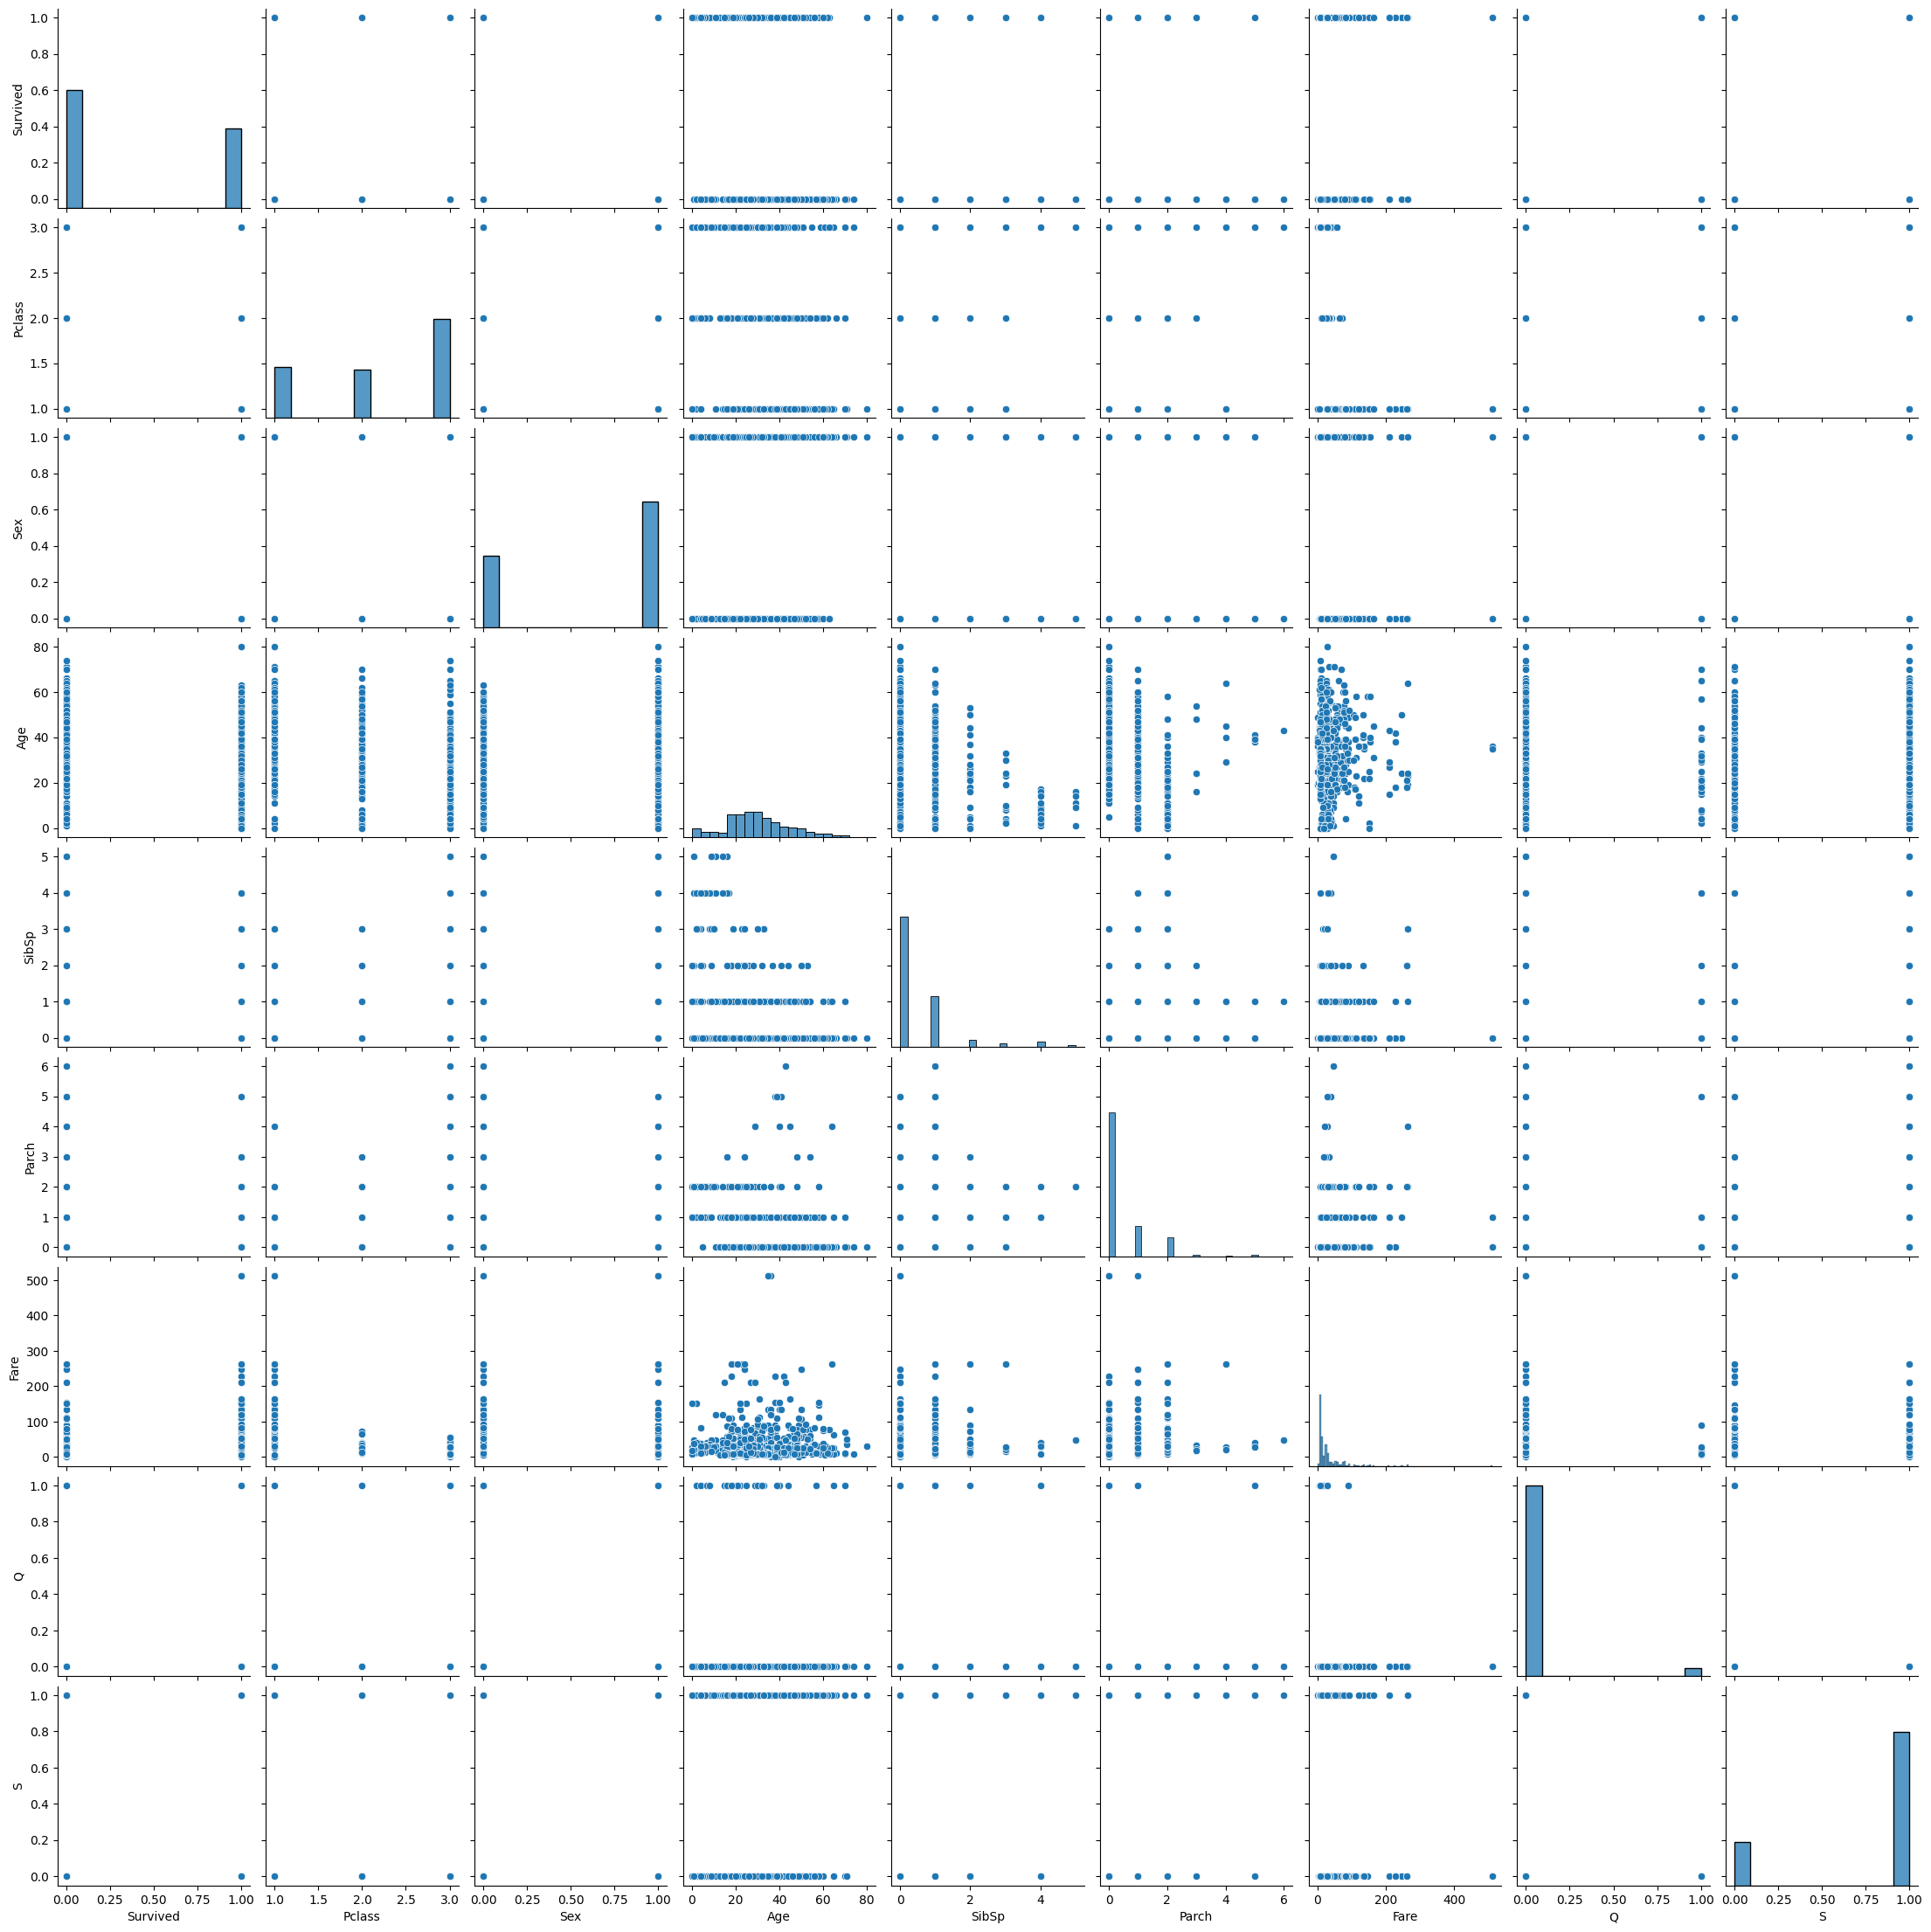

In [123]:
sns.pairplot(df)

Feature importance

In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [127]:
X = df.iloc[:,1:]

In [128]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1


In [129]:
y = df.iloc[:,0]

In [130]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [131]:
from sklearn.ensemble import ExtraTreesClassifier

In [132]:
feat = ExtraTreesClassifier()

In [133]:
feat.fit(X,y)

ExtraTreesClassifier()

In [135]:
feat.feature_importances_

array([0.11657125, 0.27220209, 0.26326234, 0.04449456, 0.04267753,
       0.23627062, 0.00600604, 0.01851555])

In [136]:
feat_imp = pd.Series(feat.feature_importances_, index = X.columns)

<Axes: >

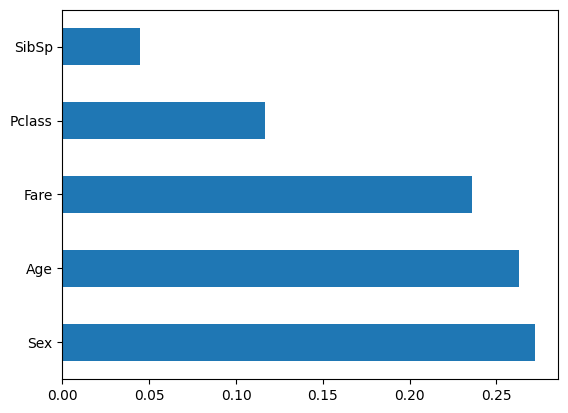

In [137]:
feat_imp.nlargest(5).plot(kind='barh')

# spliting the data

In [138]:
skf = StratifiedKFold(n_splits=5)

In [139]:
for train_index , test_index in skf.split(X,y):
  X_train , X_test = X.iloc[train_index],X.iloc[test_index]
  y_train , y_test =  y.iloc[train_index],y.iloc[test_index]

Model selection

In [140]:
classifier = LogisticRegression()

train the model

In [141]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

testing the model

In [142]:
y_pred = classifier.predict(X_test)

 EDA

In [145]:
final=pd.DataFrame({'Actual': y_test ,'Predicted': y_pred})

In [147]:
final.head()

,Actual,Predicted
712,1,0
716,1,1
717,1,1
720,1,1
723,0,0


<Axes: >

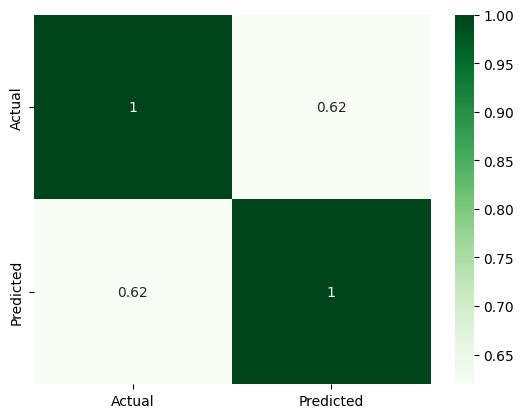

In [148]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

performance metric - confusion matrix

In [149]:
confusion_matrix (y_test,y_pred)

array([[72, 12],
       [14, 44]])

In [ ]:
accuracy = (72+44)/total

In [150]:
from sklearn.metrics import classification_report

In [151]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85        84\n           1       0.79      0.76      0.77        58\n\n    accuracy                           0.82       142\n   macro avg       0.81      0.81      0.81       142\nweighted avg       0.82      0.82      0.82       142\n'

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy_score(y_test,y_pred)

0.8169014084507042

exportation of model & dataset

module - pickle

* serialisation - deserialisation
* dumping - undumping
* pickling - unpicling
*

In [181]:
import pickle

In [182]:
pic = pickle.dumps(classifier)

In [ ]:
unpickle = pickle.load(pic)